In [22]:
# Clean the Data and Save CSV File

import pandas as pd

# Load the dataset
file_path = 'medical_clean.csv'
data = pd.read_csv(file_path)

# Specify the columns to keep
columns_to_keep = [
    'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 
    'Hyperlipidemia', 'BackPain', 'Allergic_rhinitis', 
    'Reflux_esophagitis', 'Asthma', 'Anxiety', 'ReAdmis'
]

# Drop all other columns
data_cleaned = data[columns_to_keep]

# Check for duplicate rows in the dataset
duplicates = data_cleaned.duplicated()
duplicate_count = duplicates.sum()

print(f"Duplicate count: {duplicate_count}, Cleaned data shape: {data_cleaned.shape}")

# Display the first few rows of the dataset to understand its structure
print(data_cleaned.head())
print(data_cleaned.info())

# Save the cleaned dataset to a CSV file
output_file_path = 'cleaned_logistic_data.csv'
data_cleaned.to_csv(output_file_path, index=False)
print(f"Cleaned dataset saved as {output_file_path}")


Duplicate count: 7446, Cleaned data shape: (10000, 12)
  HighBlood Stroke Overweight Arthritis Diabetes Hyperlipidemia BackPain  \
0       Yes     No         No       Yes      Yes             No      Yes   
1       Yes     No        Yes        No       No             No       No   
2       Yes     No        Yes        No      Yes             No       No   
3        No    Yes         No       Yes       No             No       No   
4        No     No         No        No       No            Yes       No   

  Allergic_rhinitis Reflux_esophagitis Asthma Anxiety ReAdmis  
0               Yes                 No    Yes     Yes      No  
1                No                Yes     No      No      No  
2                No                 No     No      No      No  
3                No                Yes    Yes      No      No  
4               Yes                 No     No      No      No  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 column

In [24]:
# Summarize the dependent variable
print("Dependent Variable (ReAdmis):")
print(data_cleaned['ReAdmis'].describe())

# Summarize the independent variables (retained columns)
print("\nIndependent Variables:")
independent_columns = [
    'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 
    'Hyperlipidemia', 'BackPain', 'Allergic_rhinitis', 
    'Reflux_esophagitis', 'Asthma', 'Anxiety'
]
print(data_cleaned[independent_columns].describe())


Dependent Variable (ReAdmis):
count     10000
unique        2
top          No
freq       6331
Name: ReAdmis, dtype: object

Independent Variables:
       HighBlood Stroke Overweight Arthritis Diabetes Hyperlipidemia BackPain  \
count      10000  10000      10000     10000    10000          10000    10000   
unique         2      2          2         2        2              2        2   
top           No     No        Yes        No       No             No       No   
freq        5910   8007       7094      6426     7262           6628     5886   

       Allergic_rhinitis Reflux_esophagitis Asthma Anxiety  
count              10000              10000  10000   10000  
unique                 2                  2      2       2  
top                   No                 No     No      No  
freq                6059               5865   7107    6785  


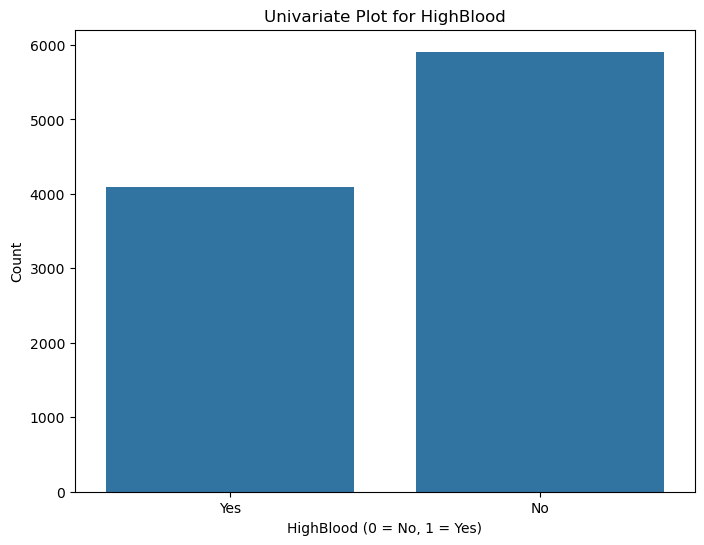

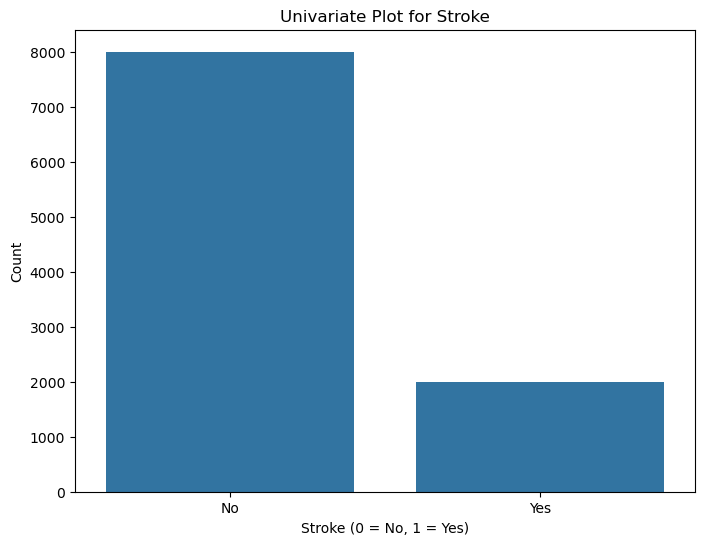

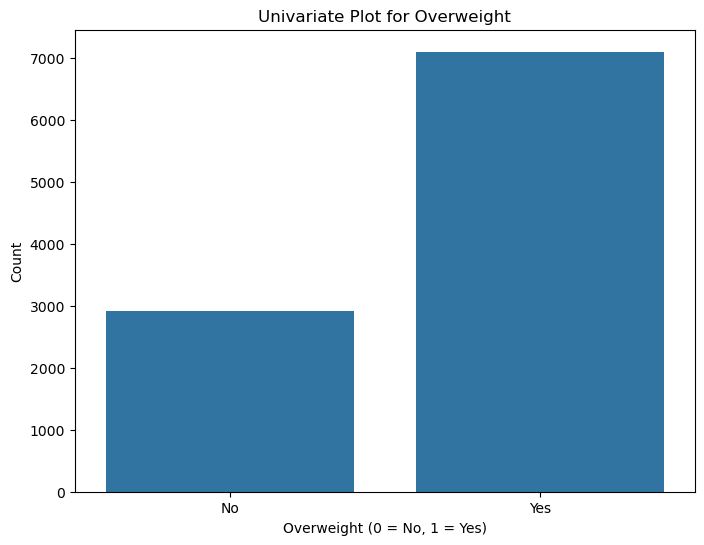

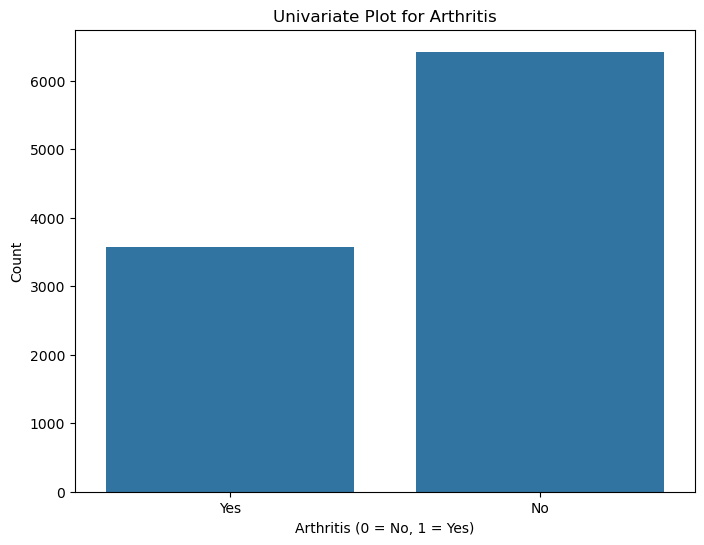

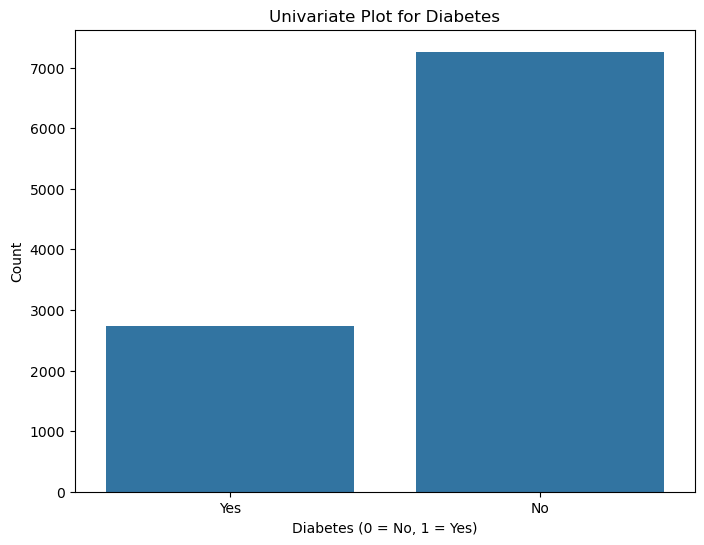

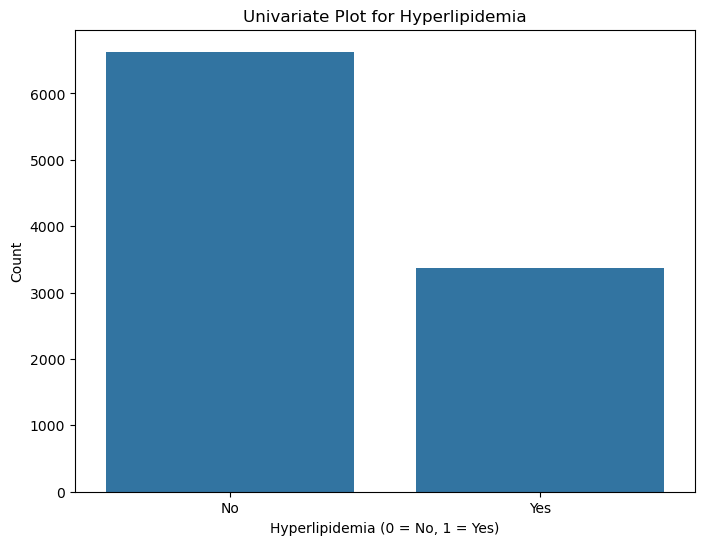

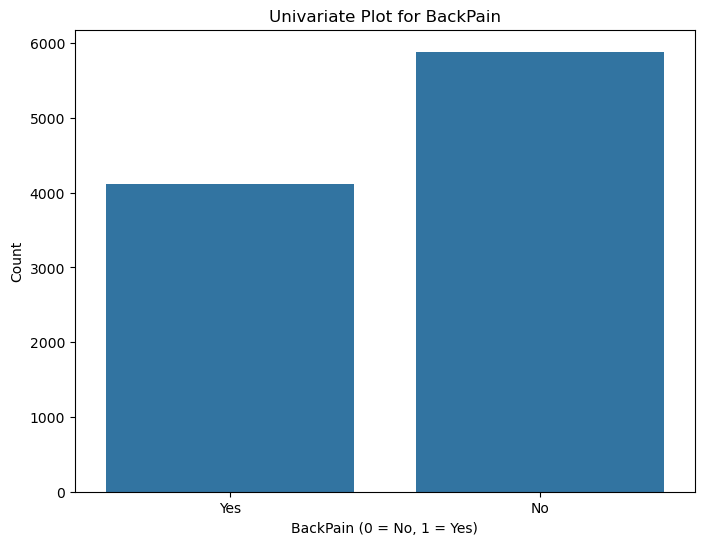

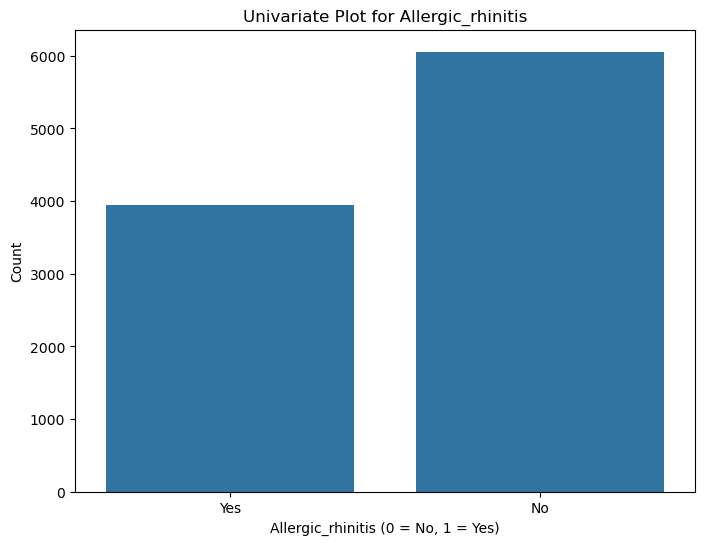

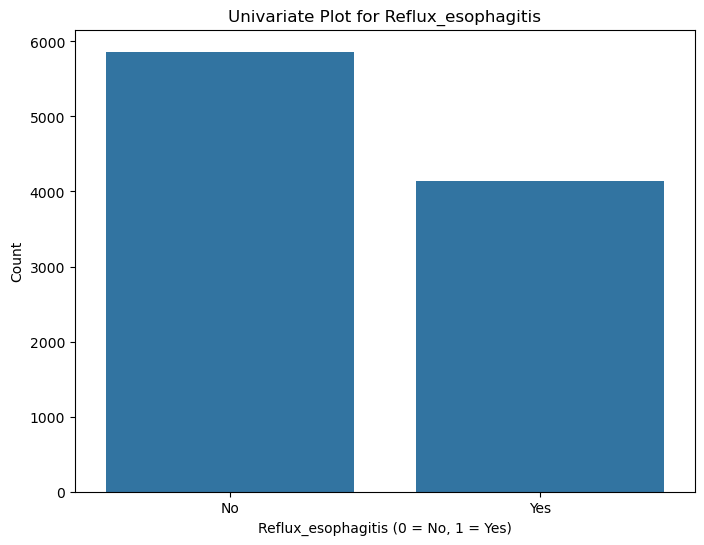

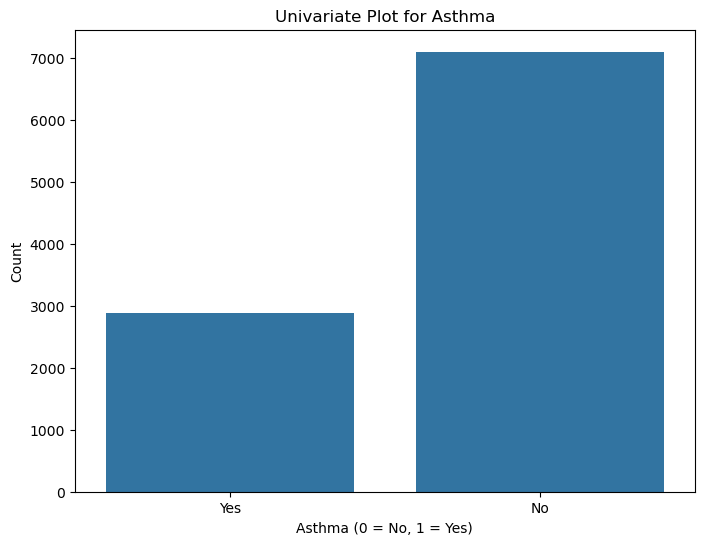

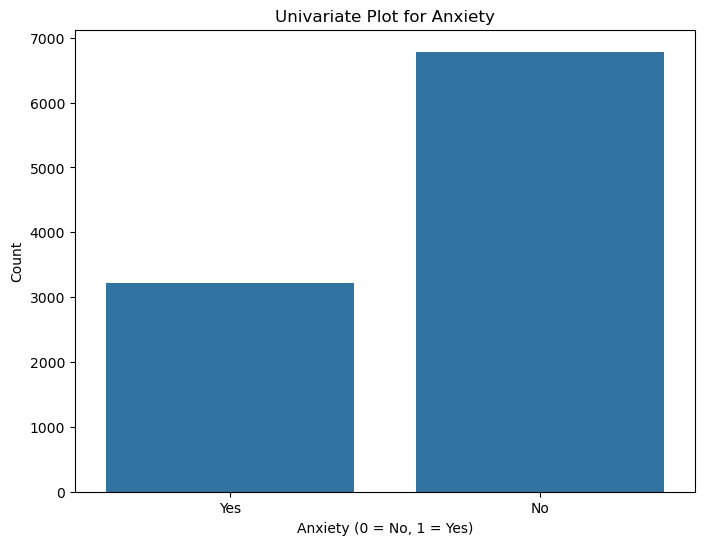

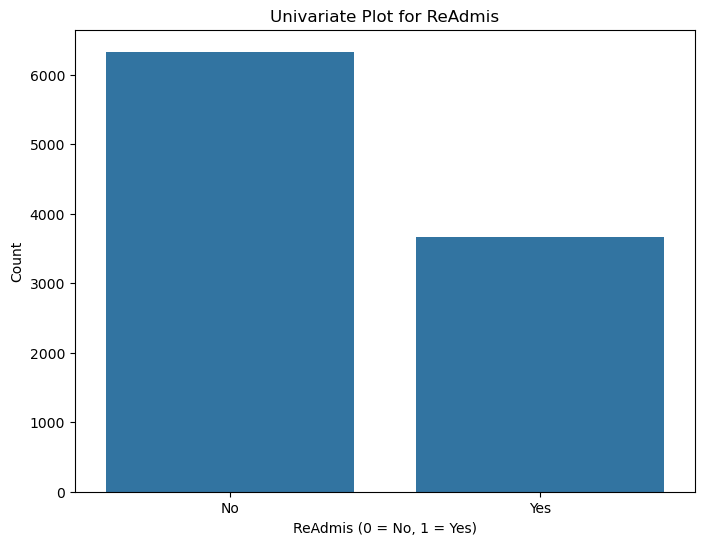

In [26]:
# Create Univariate Visualizations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the dataset
file_path = 'cleaned_logistic_data.csv'
data = pd.read_csv(file_path)

# Define the variables for univariate visualization
independent_vars = [
    'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes',
    'Hyperlipidemia', 'BackPain', 'Allergic_rhinitis',
    'Reflux_esophagitis', 'Asthma', 'Anxiety'
]
dependent_var = 'ReAdmis'

# Univariate visualization for each variable
for col in independent_vars + [dependent_var]:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=col)
    plt.title(f'Univariate Plot for {col}')
    plt.xlabel(f'{col} (0 = No, 1 = Yes)')
    plt.ylabel('Count')
    plt.show()


   HighBlood  Stroke  Overweight  Arthritis  Diabetes  Hyperlipidemia  \
0          1       0           0          1         1               0   
1          1       0           1          0         0               0   
2          1       0           1          0         1               0   
3          0       1           0          1         0               0   
4          0       0           0          0         0               1   

   BackPain  Allergic_rhinitis  Reflux_esophagitis  Asthma  Anxiety  ReAdmis  
0         1                  1                   0       1        1        0  
1         0                  0                   1       0        0        0  
2         0                  0                   0       0        0        0  
3         0                  0                   1       1        0        0  
4         0                  1                   0       0        0        0  


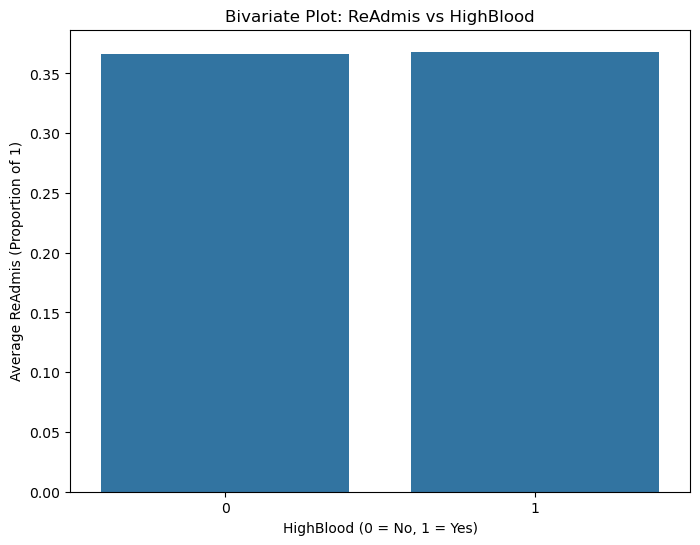

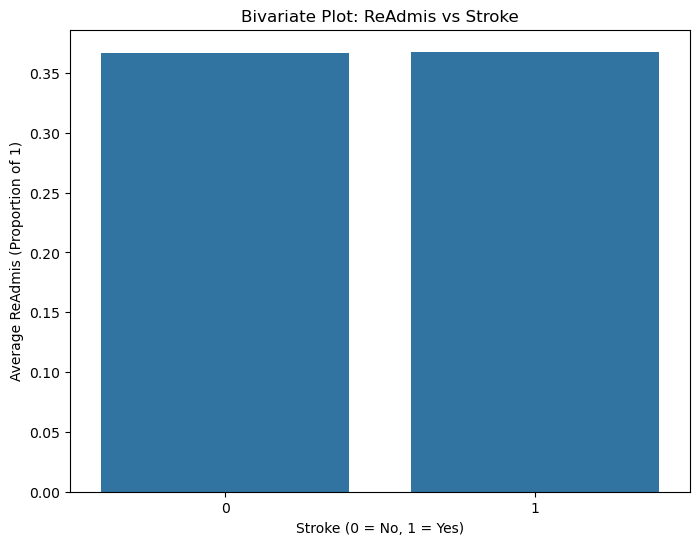

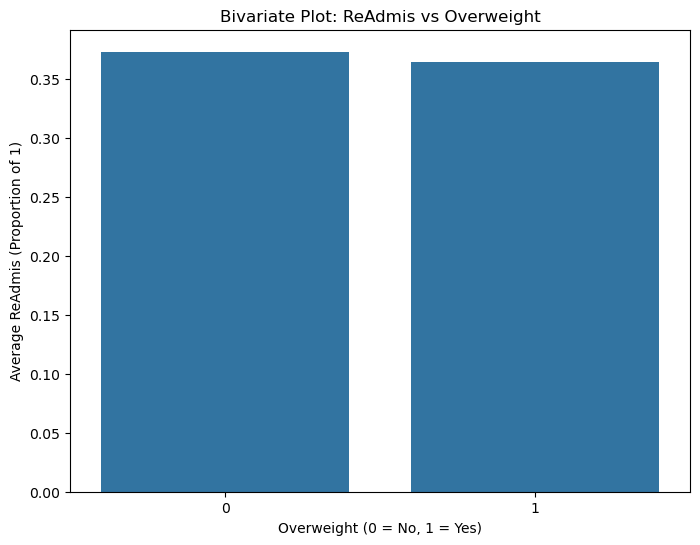

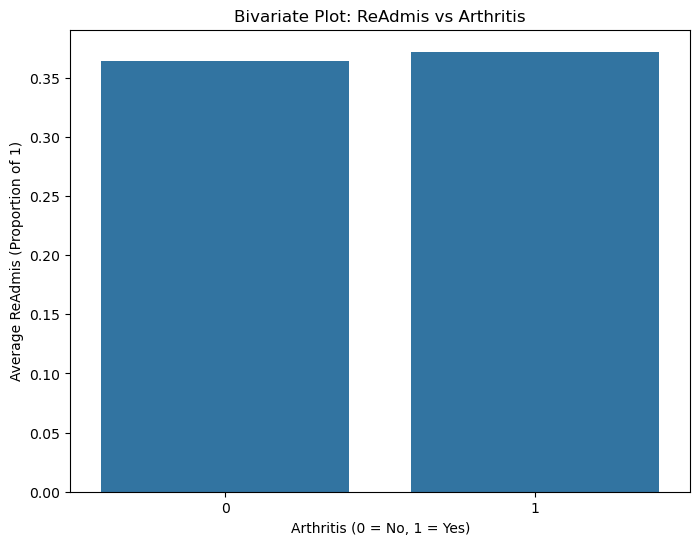

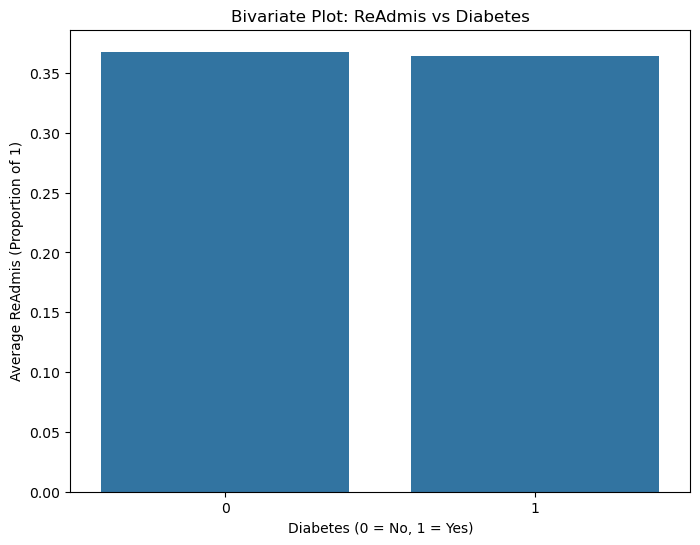

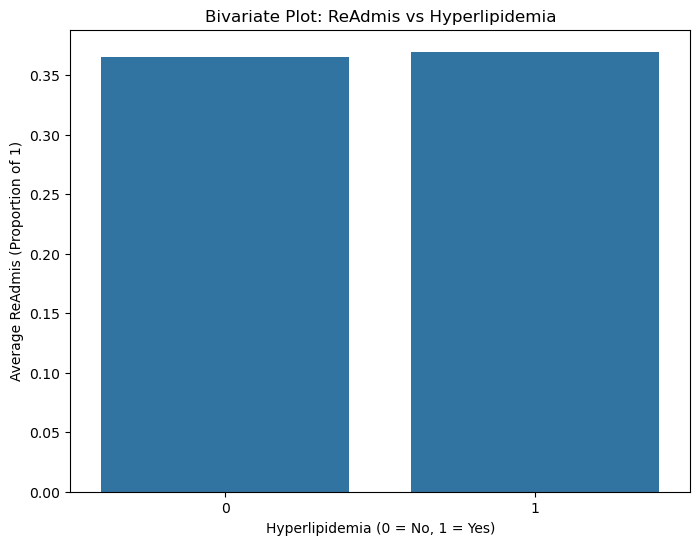

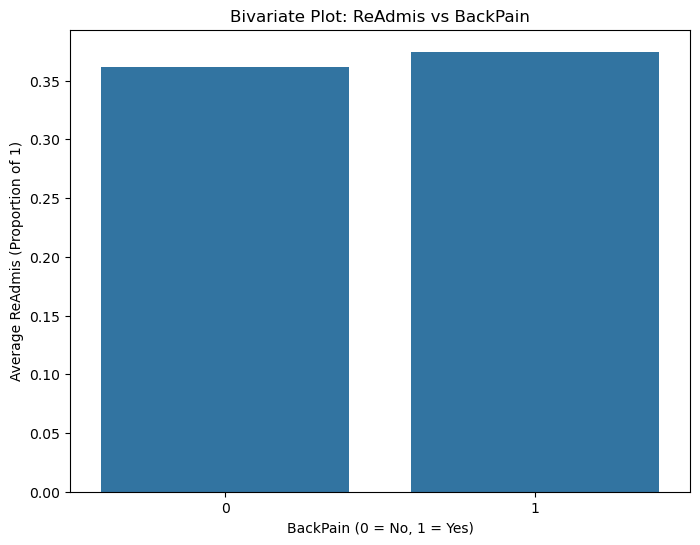

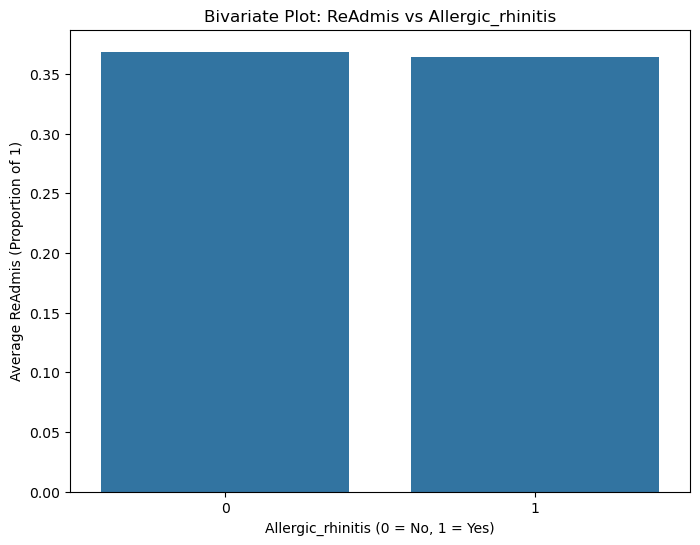

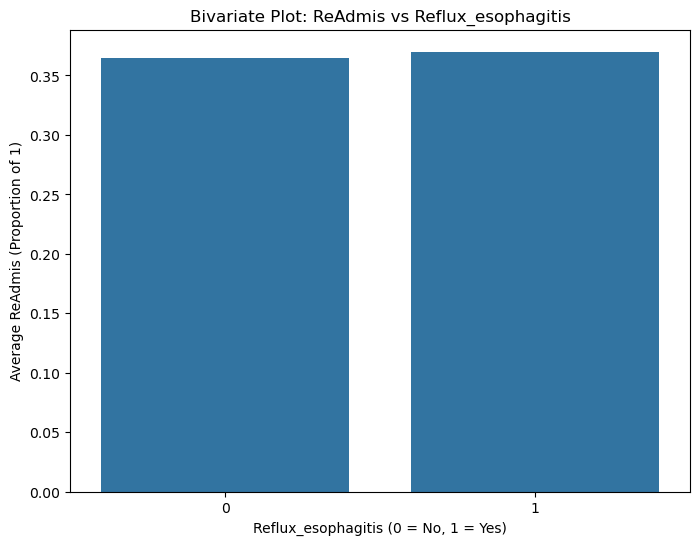

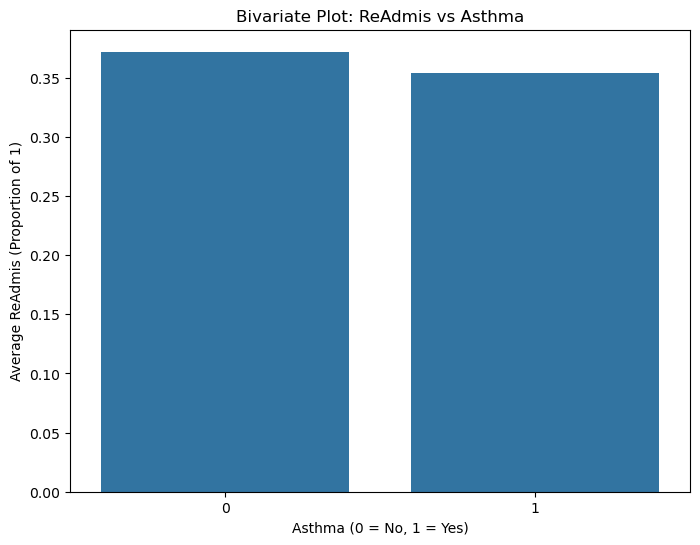

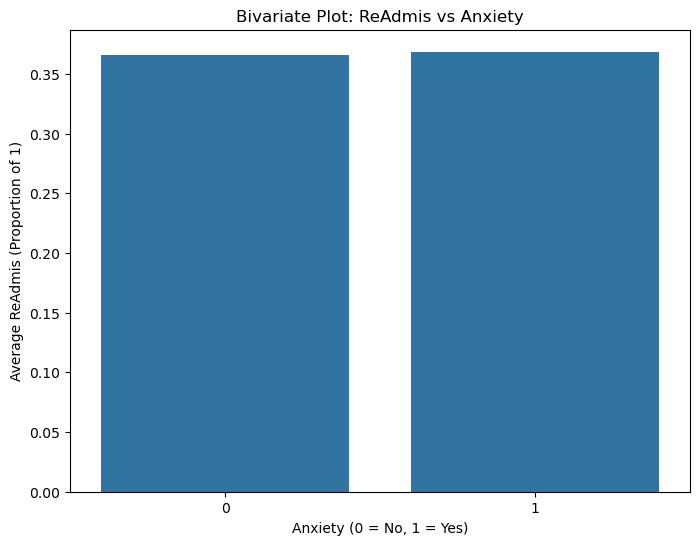

In [28]:
# Create Bivarate Visualizations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'cleaned_logistic_data.csv'
data = pd.read_csv(file_path)

# Define the independent variables and the dependent variable
independent_vars = [
    'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes',
    'Hyperlipidemia', 'BackPain', 'Allergic_rhinitis',
    'Reflux_esophagitis', 'Asthma', 'Anxiety'
]
dependent_var = 'ReAdmis'

# Encode binary variables as 0 and 1
binary_mapping = {'No': 0, 'Yes': 1}
for col in independent_vars + [dependent_var]:
    data[col] = data[col].map(binary_mapping)

# Check if encoding worked
print(data.head())

# Bivariate visualizations
for col in independent_vars:
    plt.figure(figsize=(8, 6))
    sns.barplot(data=data, x=col, y=dependent_var, errorbar=None)  # errorbar=None to suppress confidence intervals
    plt.title(f'Bivariate Plot: {dependent_var} vs {col}')
    plt.xlabel(f'{col} (0 = No, 1 = Yes)')
    plt.ylabel(f'Average {dependent_var} (Proportion of 1)')
    plt.show()


In [30]:
# Data Transformation
import pandas as pd

# Load the dataset
file_path = 'cleaned_logistic_data.csv'
data = pd.read_csv(file_path)

#Encode "Yes" and "No" as Binary
binary_mapping = {'No': 0, 'Yes': 1}
binary_columns = [
    'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes',
    'Hyperlipidemia', 'BackPain', 'Allergic_rhinitis',
    'Reflux_esophagitis', 'Asthma', 'Anxiety', 'ReAdmis'
]

for col in binary_columns:
    data[col] = data[col].map(binary_mapping)

# Preview the updated dataset
print(data.head())

# Save the updated dataset to a new CSV file
output_file_path = 'transformed_logistic_data.csv'
data.to_csv(output_file_path, index=False)
print(f"Updated dataset saved to {output_file_path}")


   HighBlood  Stroke  Overweight  Arthritis  Diabetes  Hyperlipidemia  \
0          1       0           0          1         1               0   
1          1       0           1          0         0               0   
2          1       0           1          0         1               0   
3          0       1           0          1         0               0   
4          0       0           0          0         0               1   

   BackPain  Allergic_rhinitis  Reflux_esophagitis  Asthma  Anxiety  ReAdmis  
0         1                  1                   0       1        1        0  
1         0                  0                   1       0        0        0  
2         0                  0                   0       0        0        0  
3         0                  0                   1       1        0        0  
4         0                  1                   0       0        0        0  
Updated dataset saved to transformed_logistic_data.csv


In [32]:
# Initial Regression Model with Confusion Matrix

import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the dataset
file_path = 'transformed_logistic_data.csv'  # Replace with the actual path
data = pd.read_csv(file_path)

# Separate independent and dependent variables
X = data.drop(columns=['ReAdmis'])
y = data['ReAdmis']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reapply column names to scaled features
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add a constant column for the intercept term
X_const = sm.add_constant(X_scaled, has_constant='add')

# Fit the logistic regression model
logit_model = sm.Logit(y, X_const)
result = logit_model.fit()

# Generate predictions and evaluate performance
y_pred_prob = result.predict(X_const)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Calculate and print accuracy
accuracy = accuracy_score(y, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Display model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.656937
         Iterations 4

Confusion Matrix:
[[6331    0]
 [3669    0]]

Accuracy: 0.63
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Tue, 28 Jan 2025   Pseudo R-squ.:               0.0005290
Time:                        20:53:59   Log-Likelihood:                -6569.4
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                    0.8028
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.5459 

In [34]:
# VIF Calculation and Display

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = X_const.columns  # Include the constant and other variables
vif_data['VIF'] = [
    variance_inflation_factor(X_const.values, i)
    for i in range(X_const.shape[1])
]

# Display VIF results
print("\nVariance Inflation Factor (VIF):")
print(vif_data)



Variance Inflation Factor (VIF):
              Variable       VIF
0                const  1.000000
1            HighBlood  1.001164
2               Stroke  1.000894
3           Overweight  1.001387
4            Arthritis  1.001397
5             Diabetes  1.000918
6       Hyperlipidemia  1.000876
7             BackPain  1.001229
8    Allergic_rhinitis  1.000464
9   Reflux_esophagitis  1.000838
10              Asthma  1.001007
11             Anxiety  1.001024


In [36]:
# Take each column off the dataset until the most accurate variable is left
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'transformed_logistic_data.csv'
data = pd.read_csv(file_path)

# Define dependent and independent variables
binary_vars = [
    'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes',
    'Hyperlipidemia', 'BackPain', 'Allergic_rhinitis',
    'Reflux_esophagitis', 'Asthma', 'Anxiety'
]
dependent_var = 'ReAdmis'

# Split the dataset into training and testing sets
X = data[binary_vars]
y = data[dependent_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Add a constant column for statsmodels
X_train_const = sm.add_constant(X_train)

# Fit the initial logistic regression model with statsmodels
logit_model = sm.Logit(y_train, X_train_const).fit(maxiter=1000)
print("\nInitial Model Summary:")
print(logit_model.summary())

# Loop to drop variables until two predictors remain
X_train_const_copy = X_train_const.copy()  # Create a copy to avoid modifying the original dataset

while len(X_train_const_copy.columns) > 2:  # Stop when 1 predictor + constant remain
    # Get p-values from the current model
    p_values = logit_model.pvalues

    # Exclude the constant term when looking for the highest p-value
    p_values = p_values.drop('const')

    # Identify the variable with the highest p-value
    max_p_var = p_values.idxmax()
    max_p_value = p_values[max_p_var]

    # Print the variable being dropped and its p-value
    print(f"\nDropping variable: {max_p_var} (p-value: {max_p_value:.4f})")
    
    # Drop the variable from the dataset
    X_train_const_copy = X_train_const_copy.drop(columns=[max_p_var])

    # Refit the logistic regression model
    logit_model = sm.Logit(y_train, X_train_const_copy).fit(maxiter=1000, disp=False)

    # Print the updated model summary
    print("\nUpdated Model Summary After Dropping Variable:")
    print(logit_model.summary())

# Print the final model summary after the loop finishes
print("\nFinal Model Summary After Reducing to Final Predictor:")
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.659091
         Iterations 4

Initial Model Summary:
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6988
Method:                           MLE   Df Model:                           11
Date:                Tue, 28 Jan 2025   Pseudo R-squ.:                0.001282
Time:                        20:55:00   Log-Likelihood:                -4613.6
converged:                       True   LL-Null:                       -4619.6
Covariance Type:            nonrobust   LLR p-value:                    0.3754
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.5914      0.073     -8.102      0.000      

In [38]:
# Reduced Regression Model Setup

import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
file_path = 'transformed_logistic_data.csv'
data = pd.read_csv(file_path)

# Define dependent and independent variables
binary_vars = [
    'Asthma'
]
dependent_var = 'ReAdmis'

# Split the dataset into training and testing sets
X = data[binary_vars]
y = data[dependent_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Add a constant column for statsmodels
X_train_const = sm.add_constant(X_train)

# Fit the initial logistic regression model with statsmodels
logit_model = sm.Logit(y_train, X_train_const).fit(maxiter=1000)

# Confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Calculate and print accuracy
accuracy = accuracy_score(y, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

print("\nReduced Model Summary:")
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.659696
         Iterations 4

Confusion Matrix:
[[6331    0]
 [3669    0]]

Accuracy: 0.63

Reduced Model Summary:
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6998
Method:                           MLE   Df Model:                            1
Date:                Tue, 28 Jan 2025   Pseudo R-squ.:               0.0003652
Time:                        20:56:11   Log-Likelihood:                -4617.9
converged:                       True   LL-Null:                       -4619.6
Covariance Type:            nonrobust   LLR p-value:                   0.06623
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4953 